In [4]:
import json
import csv
import sys

db = 49220

def szures(s):
	s = s.lower()
	s = s.replace("\u00e0", "a")
	s = s.replace("\u0103", "a")
	s = s.replace("\u00e1", "a")
	s = s.replace("\u00e2", "a")
	s = s.replace("\u0391", "a")
	s = s.replace("\u03b1", "a")
	
	s = s.replace("\u00e9", "e")
	s = s.replace("\u00e8", "e")
	
	s = s.replace("\u00ed", "i")
	s = s.replace("\u00ec", "i")
	s = s.replace("\u00ee", "i")
	
	s = s.replace("\u00f3", "o")
	s = s.replace("\u00f6", "o")
	s = s.replace("\u0151", "o")
	s = s.replace("\u039f", "o")
	
	s = s.replace("\u039b", "l")
	
	s = s.replace("\u00fa", "u")
	s = s.replace("\u0171", "u")
	s = s.replace("\u00fc", "u")
	s = s.replace("\u016b", "u")
	
	s = s.replace("\u015f", "s")
	s = s.replace("\u0219", "s")
	
	s = s.replace("\u021b", "t")
	s = s.replace("\u0163", "t")
	
	s = s.replace("\u0e4f", "")
	s = s.replace("\u032f", "")
	s = s.replace("\u0361", "")
	
	s = s.encode('ascii', 'ignore').decode('utf8')
	
	return s

with open("proba.txt") as f:
	s = f.read()
s = szures(s)
data = json.loads(s)

print(data[:5])

[{'id': 0, 'birth': 'keresztur', 'name': 'boholt lore', 'studwhere': 'orbán balázs gimnázium, székelykeresztúr', 'livesin': 'szèkelykeresztur, harghita, romania'}, {'id': 1, 'livesin': 'csikszentdomokos', 'other1': 'venczel józsef iskolaközpont   csíkszereda', 'birth': 'csikszereda', 'name': 'nelut kémenes'}, {'marriedto': 'péterfy eniko', 'studwhere': 'none', 'livesin': 'angyalföld, budapest, hungary', 'workwhere': 'drogmentes világért alapítvány   magyarország', 'name': 'kovács iulia', 'birth': 'udvarhely', 'id': 2, 'workwhat': 'helyettes ügyvezető'}, {'id': 3, 'name': 'monica ana szep', 'birth': 'barot', 'livesin': 'budapest, hungary'}, {'birth': 'szentgyorgy', 'name': 'matei szabolcs', 'marriedto': 'lászló tünde', 'id': 4}]


In [5]:
def count_occurence_of(col):

    dict = {}
    for i in data:
        if col in i:
            b = i[col]
            if b in dict:
                dict[b] = dict[b] + 1
            else:
                dict[b] = 1
    return dict

birth_cities_count = count_occurence_of("birth")
print(birth_cities_count)

{'keresztur': 2830, 'csikszereda': 3508, 'udvarhely': 3310, 'barot': 2335, 'szentgyorgy': 3494, 'kezdi': 3384, 'kovaszna': 3915, 'szovata': 1522, 'vasarhely': 3823, 'gyergyo': 3461, 'vlahica': 2329, 'segesvar': 2539, 'kolozsvar': 3942, 'balan': 2312, 'regen': 2770, 'toplita': 2564, 'parajd': 1182}


In [7]:
birth_cities = list(birth_cities_count.keys())

stud_dict = dict.fromkeys(birth_cities,0)
for i in data:
    if "studwhere" in i:
        if i["studwhere"] != "None":
            city = i["birth"]
            stud_dict[city] = stud_dict[city] + 1

work_dict = dict.fromkeys(birth_cities,0)            
for i in data:
    if "workwhere" in i or "workwhat" in i:
        city = i["birth"]
        work_dict[city] = work_dict[city] + 1

print(stud_dict)
print(work_dict)

{'keresztur': 1313, 'csikszereda': 1605, 'udvarhely': 1518, 'barot': 1124, 'szentgyorgy': 1623, 'kezdi': 1609, 'kovaszna': 1880, 'szovata': 664, 'vasarhely': 1720, 'gyergyo': 1477, 'vlahica': 964, 'segesvar': 1124, 'kolozsvar': 1767, 'balan': 956, 'regen': 1180, 'toplita': 1192, 'parajd': 459}
{'keresztur': 1585, 'csikszereda': 1777, 'udvarhely': 1673, 'barot': 1258, 'szentgyorgy': 1900, 'kezdi': 1741, 'kovaszna': 2081, 'szovata': 741, 'vasarhely': 2065, 'gyergyo': 1700, 'vlahica': 1132, 'segesvar': 1335, 'kolozsvar': 2235, 'balan': 1107, 'regen': 1436, 'toplita': 1341, 'parajd': 611}


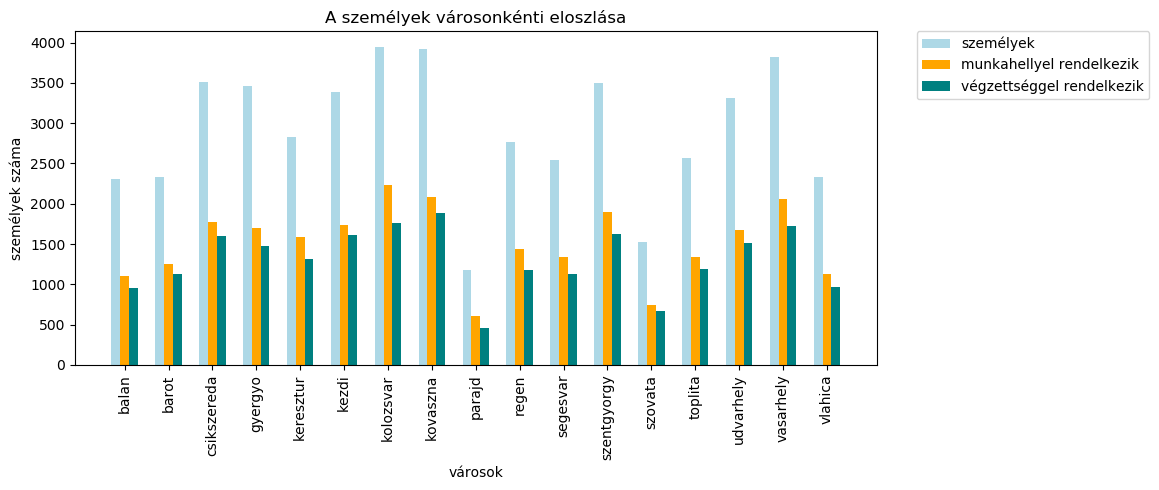

('balan', 'barot', 'csikszereda', 'gyergyo', 'keresztur', 'kezdi', 'kolozsvar', 'kovaszna', 'parajd', 'regen', 'segesvar', 'szentgyorgy', 'szovata', 'toplita', 'udvarhely', 'vasarhely', 'vlahica')


In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 5), dpi=100)

birth_list = sorted(birth_cities_count.items())
stud_list = sorted(stud_dict.items())
work_list = sorted(work_dict.items())
x1, y1 = zip(*birth_list)
x2, y2 = zip(*work_list)
x3, y3 = zip(*stud_list)

bar_width = 0.2
index = np.arange(17)

bar1 = plt.bar(index, y1, bar_width, color='lightblue', label='személyek')
bar2 = plt.bar(index + 0.2, y2, bar_width, color='orange', label='munkahellyel rendelkezik')
bar3 = plt.bar(index + 0.4, y3, bar_width, color='teal', label='végzettséggel rendelkezik')


plt.xticks([i + 0.2 for i in range(17)],sorted(birth_cities), rotation=90)
plt.xlabel("városok")
plt.ylabel("személyek száma")
plt.title("A személyek városonkénti eloszlása")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()
print(x1)

In [27]:
schools = count_occurence_of("studwhere")
for key, el in schools.items():
    print(key, el)

orbán balázs gimnázium, székelykeresztúr 96
none 181
nagy istván művészeti liceum 40
sapientia emte marosvásárhely 28
gÁbor Áron szakkÖzÉpiskola 407
universitatea transilvania brasov 238
egeszsegugyi foiskola szekelyudvarhely 1
akg bp, sapientia emte csíkszereda 1
egeszsegugyi liceum 6
tamási Áron gimnázium 30
egeszsegugyi technikum csikszereda 1
umf iuliu hatieganu cluj napoca 45
bányai jános műszaki szakközépiskola 41
uni wuppertal 1
az Élet iskolája 30
tessedik sámuel főiskola 2
nagy mózes elméleti líceum   kézdivásárhely 154
babeş bolyai university 726
umf targu mures 44
academia de muzica "gheorghe dima" cluj napoca 17
babes bolyai university of cluj 1
gépgyártó iskolaközpont 114
palló imre művészeti szakközépiskola 37
st. helena junior high school 1
colegiul universitar medical bv 1
marosvasarhelyi szinmuveszeti egyetem 5
bányai jános szakközépiskola 102
facultatea de fizica, universitatea babes bolyai 3
baróti szabó dávid 184
post liceal sanitar eugen nicoara reghin 2004 1
unive

pte ttk 2
iefs bucuresti 2
scoala postliceala sanitara carol davila 7
balneofiziokinetoterapie şi recuperare la universitatea de medicina si farmacie targu mures 1
mihai eminescu cluj napoca 1
modern uzleti tudomanyok foiskolaja 1
afaceri lemn 1
facultatea de relatii internationale si studii europene, oradea 1
universitatea babes bolyai, facultatea de sociologie si asistenta sociala 3
as 1
facultatea de educatie fizica si sport ubb cluj 2
universitatea de medicina si farmacie "victor babes" timisoara 2
szovàta, mures, romania 1
facultatea de medicina "victor papilian" 3
............................ 1
ubb,psychology and human resources 1
colegiu tehnic de transporturi 1
facultatea de constructii si arhitectura timisoara 1
liceul de artă plugor sándor sf.gheorghe 13
universitatea politehnica timisoara 6
universitatea transilvania brasov, facultatea de litere 4
academia de muzică "gheorghe dima", cluj napoca 2
semmelweis egyetem testnevelési és sporttudományi kar 1
,,,,,,,,,,,,,,,, 1
spir

miu sighisoara 4
brassói transilvania egyetem 1
the ohio state university 1
niit 1
universitatea bacau 1
iaa school romania 2
upm mures 1
facultatea de business, universitatea babes bolyai din cluj napoca 1
mome   moholy nagy művészeti egyetem 9
universitatea crestina partium 6
benedek elek tanítóképző 3
3 as számú ipari líceum   sepsiszentgyörgy 4
tehnikum 1
facultatea de arte si design   timisoara 4
bbte gyógypedagógia 1
liceul de arte plastice 2
world press institute 1
székely károly szakközépiskola 3
grup scolar nicolae balcescu 9
scoala postliceala sanitara mihai eminescu toplita 1
ubb, fsega, cluj napoca 2
vestige academy   make up 1
ut cluj calculatoare 2
geografie turism 1
asistent medical generalist 12
nu am facultate 1
colegiul naţional "mircea eliade" sighişoara 3
gabor aron muszaki oktatasi kozpont 5
universitatea hyperion, facultatea de stiinte economice 2
ies lluis de peguera 1
sport 1
facultatea de automatica si calculatoare, universitatea tehnica din cluj napoca 7
maste

universitatea aierronautica timisoara 1
usp pszichológia 1
hova még azt is??? 1
uaic iasi 1
diabetológiai szakápoló 2
colegiul economic transilvania tg mures 1
universidad de chile 1
bábes bolyai közgasdaságtan 1
páli szent vince egeszsegügyi főiskola 4
suli 1
ubb. cluj,psychology 1
facultatea de pregatire casnik 1
poliţia română 1
kétegyházi mezőgazdasági szakképző iskola és kollégium 1
fsega   masterat   managementul resurselor umane 1
34. számú gábor Áron cserkész csapat 2
babes bolyai tudományegyetem, filológia kar, kolozsvár 2
zimmethausen 3
colegiul tehnic târnăveni   "liceul de chimie" 3
università delle arti vampiriche 1
vasile alecsandri bacau 1
ecole supérieure art et design de st etienne 1
grup scolar economic administrativ berde aron 5
bábes bolyai 2
universitatea d smecherie 1
ueb bucuresti 1
kós károly Építőipari szakközépiskola, csikszereda 2
elte Ájk 2
facultatea de litere, universitatea bucuresti 3
lucian blaga szeben 2
universitatea "bogdan vodă" din cluj napoca 1
tcm

universitatea de arta si design cluj napoca  departamentul design 1
massachusetts institute of technology (mit) 3
moholy nagy university of art and design (budapest) 1
crystal nails hungary 1
colegiul tehnic 4
ip/3 marosvasarhely 1
imperial college london 3
bbte   bölcsészettudományi kar 2
universitatea george baritiu 2
babes bolyai kolozsvar 2
kelenföldi műszaki középiskola 1
academia de arte vizuale andreescu 1
semi 1
colegiul "mihai eminescu" bacau 1
budapest oszk 1
facultatea de medicina vasile goldis 1
hochschule für musik freiburg 1
fsega dezvoltare regionala durabila 1
babes bolyai 2
usamvbt timisoara 1
dr petru groza líceum jelenleg tamási Áron gimnazium 2
masuratori terestre si cadastru ubb 1
academia de studii economice, ase 1
grupul scolar ”ion vlasiu” tirgu mures 1
facultatea de ingineria lemnului braşov 1
universitatea babes bolyai, facultatea de stiinte economice si gestiunea afacerilor 2
református kollégium   kézdivásárhely 1
universitatea transilvania, facultatea bsi 1

nagyvarad partium egyetem 2
kereskedelmi 1
zejk domokos 1
partiumi keresztéy egyetem 1
institutul politehnic bucuresti 1
technical university of graz 1
universitea tehnica cluj napoca 1
tu wien 1
sulyok istvan foiskla 1
scoala postliceala studia 1
domokos kazmer(szováta) 2
brassói egészségügyi technikum 1
toni & guy hairdressing academy 1
louis pasteur university 2
Ștefan cel mare university of suceava 1
sighisoara, transilvania 1
ut kolozsvar 1
közgÁz!   budapesti corvinus egyetem 1
középiskola 1
ma irish studies 1
ubb, cluj   napoca business management 1
renmin university of china 1
secretariat 1
"louis pasteur" posztliceum csikszereda 1
eurocor  inspector resurse umane 1
colegiul tehnic de comunicatii augustin maior cluj napoca 1
fspac 1
szakközép 1
centrul de reeducare 1
raoul wallenberg humán szakképző iskola és gimnázium 1
università degli studi di torino, facoltà di psicologia 1
szentgyötgyi istván szíművészeti egyetem marosvásárhely 1
veszprém,szeged,pécs római katolikus teológ

In [28]:
workwhat = count_occurence_of("workwhat")
for key, el in workwhat.items():
    print(key, el)

helyettes ügyvezető 1
former legal practitioner 1
former web developer 2
dj 12
asszisztensno 5
műkörömépítő, manikűrös, pedikűrös 1
asistent medical generalist 30
registered nurse 7
tanár 51
former pultos felszolgáló 1
musician 6
arbeiter 3
barista 9
asistente 1
former boat cleaner 2
staff 3
former korebacsos 1
kosarlabda 2
melós 2
referent bancar 4
deputat 2
scout (sport) 1
marketing 7
hair stylist 21
reception specialist 1
referee 3
logistica 1
midfielder 7
publicity manager 1
former főnökasszony 1
teaching assistant 5
former Şofer 1
greenhouse worker 1
reporter 4
még suliba járok 2
redactor șef 1
civil design engineer 1
students 2
tanulo 4
elarusitono 6
director of the federal bureau of investigation 2
travel agent 3
corespondent journalist 2
muncitoare 4
software developer 36
operator 45
ovono 2
tehnician electronist 2
saxophonist 1
former beszerzo 2
couchtester 1
főnök 12
senior journalist 1
pÉk 1
administrator 108
medic rezident psihiatru 4
social work 8
internal medicine residen

public speaker & founder 1
pszichológus 8
igen 2
magna racino 1
constable 1
jomunkasember 2
műkörömépitő, manikűrös, pedikűrös 1
frachtabteilung 1
teacher assistant 1
külkapcsolati referens 2
auto szerelő 1
talent manager 3
process analyst 1
director/owner 1
cotracom 1
stoper 1
coordonator transport 1
business analyst/ implementation consultant 2
key account representative 1
p'acolo ni : ) 1
former bartender 9
masaj 1
forgalmazo 2
farmer 2
housekeeper 3
financial advisor 1
senior forwarder 1
head bartender/mixologist 3
középályás 1
munkás 17
case manager 1
konyvelo 4
Üzletépítő a life care corp bio cégnél 2
betanitot munkás. 1
maszor 1
former photographer 5
t.a. 2
adminisztrátor, ügyintéző 2
inginer auto 1
baga bani 1
sales support engineer 1
svédország 1
former tanÍtÓnŐ 6
geschäftsführer 3
altalanos aszisztensno 1
kreativ chef 2
butor fenyezo asztalos 2
former profesor de limba si literatura romana 1
researcher 5
former design engineer 1
veteran monkey 1
ceo & co founder 1
múnkás!! 1


tanár edző, igazgató 2
former driver 2
hairstylist/barber 1
former szakfelügyelő 1
butcher 2
defender 2
lapárus 1
sef de echipa 3
fondator 3
ez is az is 2
former varrÓnŐ 3
lect universitar 1
pr menedzser 1
cabin attendant 1
kamilla jedd Ügyvezető könyvelő 1
informatics consultant 1
forklift driver 1
quality coach 2
lector universitar doctor 2
designer/owner 2
chief mate 1
former marketing 1
lorry driver 2
fodrasz,manikur,pedikur es mukoromepito 1
student reprezentant in biroul operativ 1
3 fronts and prospective ec 1
tengő 1
profesor învățământ primar 1
kasiere ab play center tauberbischofsheim 1
information security manager 1
make up and hair stylist 1
komuves 1
work legalizare canabis 1
magyar iparszovetseg oktatasi kozpont 1
london 1
research consultant 1
cadru didactic universitar 2
administrator firma proprie 1
semmi 5
senior tedx ambassador 1
former cutter/qc 1
former sefa la buzunarul lui mami si tati 1
sor vezeto 1
video jurnalist 1
nemzetközi gépkocsivezető 1
sangeorzudemures 

former aszisztensno 3
fazy lem mob.srl 1
szilezit kft 1
owner/tattoo artist 1
varrodai alkalmazott 1
smartworker.ro 1
drumer 1
sef lucrari gastroenterologie 1
inspector publicist 1
vocal 1
viragkoto 1
szeletelő 1
oktatási vezető 1
mecanic locomotiva 1
bus driver 4
medic specialist ortodont 1
former ministrans 1
cap smr vente 1
tractor driver 1
platform manager 1
tengsz lengsz 1
operator statie de betoane 1
tel 0746392401 elérhetö 1
fuvos dobos 1
villanymotor tekercselő 1
psiholog, psihoterapeut & coach 1
tervező és csillagjáró 1
manager aszisztens 2
procurement assistant 1
nursing 4
hosszu... 1
consilier parlamentar 2
sef la fabrica de super glue 1
háromszéki szerkesztő 3
medic primar 1
gyeplöszárbekötő 1
intro relatie patul meu viata de noapte 1
erdész hivatásos vadász 3
instrumentist 2
szobalàny 1
francia  és olasztanár 1
dental assistant 1
laborasszisztens 1
the face 2
senior .net developer 1
nyomdász 2
qa automation engineer 1
drone pilot 2
recruitment coordinator 1
tooling enginee

pflegerin 3
former reprezentant vanzari 2
lemezlovas 1
qa/qc engineer/supervisor 1
művészettörténész főmuzeológus 1
urology resident 1
marketing & pr consultant 1
sports reporter 1
 laborant 1
vocalista 1
photography and social media 1
perfect 1
seful sefilor 1
support 1
anesthesiologist resident physician 1
electricean 1
world team 1
former bla.bla...bla 1
politist 1
suli 1
főszakács 1
neurochirurgie 1
hochei 1
reseller 1
agent of romania 1
get the job done! 1
bodyguard 1
conducator auto 3
lakatos gépkezelo 1
dragoste mea 1
betegápoló 3
casnicá 1
fejlesztő pedagógus 1
diagnostic technician 1
program director 1
anlagenmechaniker 1
bicycle composer 2
tanár edző 1
computer scientist 1
former tata hotilor 1
former geologus 1
koptatom a gumikat es azaltal az utakat....hogy ne a lelkem kopjon :) 2
csomagoló 2
capo 1
bohemian bartender 1
collaborateur scientifique 1
estetista 1
former basketball 1
expert topograf 1
megelöző karbantartó, gépbeállító technikus 1
fumigation 1
pop előadó, dj, ze

ux designer 1
founder, owner and ceo 1
cafengiu 1
former administrator patrimoniu 1
former van 1
befekteö 1
sofer tir si autobuz 1
tanácsadó tanár 1
graphic design   laser development 1
sales adviser 1
graphic designer and owner 1
aww zerspanungstechnik 1
delägare 1
dijbeszedo ugynok agent incasator 1
future könyvelő 1
supraveghetor slot machine 1
former community relations coordinator 1
visiting professor 1
free lance artist 1
comisia pentru politică externă 1
kindergartenpädagogin wien 1
former :) 1
former kereskedő 1
district manager, independent consultant 2
solothurn, switzerland 1
former housekeeping 1
holding area manager 1
former aiuto cuoco 1
inhaberin 1
programator productie 1
former research engineer 1
former executive vice president 1
budapest 1
former kozmetikus,sminktetováló 2
photo 1
assistant professor 2
fitness professional 1
national sales & marketing manager 1
szülész nőgyógyász főorvos 1
g onok 1
Ügyvezető helyettes 1
boxoló 1
Úszómester 1
sef statie 1
owner/editor 

In [29]:
workwhere = count_occurence_of("workwhere")
for key, el in workwhere.items():
    print(key, el)

drogmentes világért alapítvány   magyarország 1
hotel salvator 3
cabinet de avocat 1
u solutions 1
eurocovasna 5
puskás tivadar szakképző líceum ditró 7
szentegyházasfalu 149
peste tot 1
még nincs :) 5
megyei surgossegi korhaz csikszereda 1
anikó szépségszalon, bokod 1
medica alpydent 3
works at holy name hospital 1
gyergyószentmiklós 28
csernik szende mesemondó www.labitaszinhaz.net 4
umf iuliu hatieganu cluj napoca 2
haren, germany 1
ingenico payment services 1
magyar posta zrt. 3
sövér elek szakközépiskola   gyergyóalfalu 3
minden 2
mostly in cafés 1
muzicant 2
dgaspc hr 11
fujikura 3
trabant 2
starbucks canada 1
bioclinica 2
erftland zeltanlagen gmbh, németorszàg 2
professional table tennis player 5
lake powell resorts and marinas 2
vagoemt kft 1
ferdinand panzio 2
valkes srl 80
world class romania 5
romániai magyar pedagógusok szövetsége 11
stefánia napközi, alpha transilvana alapítvány 1
kse   kézdivásárhelyi sportegyesület 27
wecast autóipari zrt 2
sc iris service ciuc sa 6
lam 

peluza sepcile rosii 7
sykes enterprises 18
microsoft 4
hamburgische staatsoper 1
liceul vocational "mihai eminescu" 1
liceul teoretic "joseph haltrich" sighisoara 14
vivere a londra 1
vion 4
sc nutrifarm therapy srl 1
bolero csikszereda 2
set proiect 1
kovászna,balneáris kezelőközpont 1
lear corporation 5
rmkt   kolozsvár 2
látó szépirodalmi folyóirat 2
larix 6
evora center reghin 1
Életművész 2
casa de productii real tv 1
hermes forwards 3
petőfi sándor Ált. isk.(csikszereda) 6
wooden houses tig rad 1
altiasi.ro 1
glückstadt, germany 1
vili temetkezes 1
beer academy pub 1
mikes kelemen elmeleti liceum 3
palms casino resort 1
sc fz bod sa 1
népművészeti iskola, sepsiszentgyörgy 2
geo tech gheorgheni 1
kozmetikus 10
mobila sovata 10
burkolo 1
hogar herbal 1
loanding ■■■■■■ 99 % 1
polgarmesteri hivatal gelence 1
budapest, hungary 39
gicone 1
gst ro sighisoara 5
telenav 3
smurd 26
spitalul municipal gheorgheni 8
nu lucrez 11
egészségfejlesztő központ   rétság 1
ljungby, sweden 1
move 1
f

fiab service gmbh 1
london stone 1
haziasszony 3
medic dentist 7
még sehol. 6
kovácsoltvas kézmìves céh 3
institut für physikalische chemie 1
nokia solutions and networks 3
fluvius regensburg s.r.l 2
awg 2
sc rozatti srl 1
manoa 2
tanító 3
sc tbe technologie srl 5
napsugár napközi szombatfalvi tagóvoda 1
reining transport kft 4
esslingen am neckar 2
langesund bad 1
firma privata 1
general logistics systems 3
bachus pékség 2
agrotrigon 1
jancso benedek 6
szent istván Ált. iskola 1
marosvásárhelyi hallgatói Önkormányzat   mshÖk 11
magyar vöröskereszt megyei szervezete 2
egészségügyi minisztérium, bukarest 3
fekete istván Általános iskola 2
csikszereda megyei surgossegi korhaz,surgossegi osztaly 2
cabinet veterinar particular 1
şöför 2
luna mora barcelona (club catwalk) 1
party szerviz 6
eurocenter amőba oktatási központ 3
savaria dent kft 1
music for life 2
pi technologies 2
carrion expedition 1
at home 2
smoker's 1
expolink 1
tenaris silcotub 1
freelance translator 1
bucharest 1
jucator

székelyudvarhely, polgármesteri hivatal 2
bernády györgy iskola (2 es számú Általános iskola) 1
emc elektromanagement & construction gmbh. 1
ijp harghita 1
pcguru.ro 1
telekom romania 5
famous dave's bar b que of america, inc. 1
lukoil 5
farmacia catena   farmacia inimii 12
a suliban koptatom a padot! 2
maxpack group kft 2
szent borbála napköziotthon  parajd 1
consiliul judetean mures 1
tanulo 3
ocedo 1
sport.ro 1
sora 1
www.soundstudio.ro 4
euro car parts 1
lakumed 1
farago kft 1
sc. cons electrificarea instal 1
jász plasztik kft. 4
lay's 3
electrocasnica   android tv, mini pc, accesorii smartphone si tablete 1
gumiszerviz kőhíd bt. 1
s.c. norada s.a 1
valid group 2
dhl global forwarding 1
Állatvédelem 2
euro dori transport 2
bod péter tanítóképző 7
savannah lions music 1
septimia hotel   wellness & spa resort 3
diák 6
olimpios travel 1
korena 4
contafex s.r.l. 1
kányádi Általános iskola, public school from kanyad   ulies 3
scoala generala gurghiu 1
gravity r&d 1
we the people bmx 1
m

aldi uk 2
szinpad 1
teatruul national targu mures 1
gas wasser und heizung installätuer 1
deva_design otthonom dísze 4
lehelfoto 1
fabrica de asigurari   broker de asigurare 1
samsung romania 3
fast food mac lewy 1
dream speedfitness 1
rtm szektor 1
grup scolar petru maior 1
budapest art factory 1
monesse by monica salcudean 1
ifj. dr. rezidencia 2
népszabadság 1
flame spray hungary kft. 1
summerbird 1
kvv zrt 1
sc platanus com srl 4
isculus kft 2
la vaida 1
asztalos 8
krónika 4
map logistik 2
unit unified intelligence taskforce 1
sst grup 1
magánválalkozó 2
egyesített bölcsőde 1
freelancer musician 1
carrefour oradea era 1
anyuka 2
deejay world 1
gartneri tvillingegaarden 1
kovaszna megyei gyermekvedelmi igazgatosag 2
molnar 1
dumagas transport sa 1
bionest frutas ecologicas 1
grup sapte 3
dávid ponyva reklám kft 1
davinc kft 2
msb mechanical ltd. 1
ocolul silvic rastolita 1
bitdefender box 1
atelier aurelia kleidmanufaktur & atelier raffinesse 1
kónya & kónya ponopol 2
contracte inte

mississippi carwash 3
ministerul apararii nationale 2
viata 1
antena targu mures 1
gyógynövénytermesztés 1
aita medie   kozepajta 3
la mia famiglia 1
kemény jános elméleti líceum 4
economist 2
select metlemplast odorhei 2
tbs aviation hamburg 1
baby sitter 2
budapest bank 2
rotaract tg mures 2
autoservire horea 89 1
a.i tofalvi ilona 1
waberer's románia 1
zaza caffe&lounge 1
olasz pizzazo 1
havita. dannstadt 1
szállító 2
kÖz pont ifjúsági egyesület 3
modern glass art 1
néptánc 5
fundacion master 1
betegápoló 1
orbán balázs gimnázium betfalva 1
szociális ellátási és gyermekvédelmi vezérigaygatóság 2
lufthansa systems hungária kft. 1
sc romaqua serv sa 1
csi kung 1
színpadon 4
disc jockey 3
hosteleria 1
språkcentrum stockholms stad 1
facultatea de business 1
diszkrét pub Étterem és pizzázó 2
fodrászat 4
no.41 mayfair 1
krajczár cafe 4
rahmer dienstleistungen 2
brutaria cetatea srl 2
isk 1
gimnaziul "serafim duicu" 1
gameloft 4
târgu secuiesc 1
institute for foreign affairs and trade 1
ne

ahol csend és idő van 1
mikó imre szakkollégium 2
salvia green line 1
auchan magyarország 3
telekom hu 2
Átlátszó erdély 1
université de montréal 1
bugetar 1
boxing 6
fogorvosi rendelo 1
gyerek nevelés 5
catwalk 1
macrostandard editura si informatica srl 1
lis logistik karlsuhe ltd 1
rustik Étterem 3
orient trans 1
kőbányai bazár 1
somerset house consulting 1
fabrica de prezervative 1
bcr erste 3
berry kézműves csokoládé 1
eds romania 1
artfoyer 1
the exzone 1
misbits 1
mirage Étterem és kávézó 1
villa klein sovata 1
emapa ibarra 3
Évi fodrászat 2
c.a.j. constanta 1
transindex.ro 6
szabadság napilap, kolozsvár 2
osut cluj napoca 1
acasatv 2
traktor dj studio 1
benedek elek napközi 2
lkw walter internationale transportorganisation ag 1
brateș 1
ovsz 1
babeș bolyai university 2
asda 1
masia ciscar s.a 1
oriflame romania 2
nokia siemens networks 4
international ski federation 4
jen trans 1
da nessuna parte 1
cushman and wakefield 1
hidalgo 1
gumax srl 1
minta csíkszereda 1
mónika pilates 

ausztria graz 1
invictus ro 1
special k house 1
adrenalin park 2
amalia fashion models 1
muzeul judetean mures / maros megyei muzeum 3
sebadi 1
hivatásos vonat kerék pumpáló 1
css reghin 5
meny 1
1puredesign 4
lucrator gestionar 1
református kollégium kézdivásárhely 1
transintex 1
mesevár napközi 1
független tanácsos   székelykeresztúr 2
rangadó.hu 1
hargita megyei mentőszolgálat 6
sc eco vidra turism srl 1
villanytelepi napköziotthon 1
amethyst radiotherapy center cluj 1
tour guide 2
la nor imp exp srl 1
altex romania 2
3 as napköziotthon,kézdivásárhely 1
www.cefacemdiseara.ro 1
home alone 1
uniunea artistilor interpreti de folclor muzical din romania 1
hilcon 2
komuves epito 1
bussiness 1
irbil, iraq 1
hotel waldhof   eppan an der weinstrasse 1
meseautó 1
pick baja 1
sephora 1
clinica academica 1
dieter hein 1
hellen's jewelry corner 1
mindenhol, ahol szükség van rám 1
sinteza  revista/magazin 1
unelte seo srl 2
croitori 1
super bet 1
lucrari mestesugite 1
sepsi bike 1
bölöni farkas 

universitatea de stiinte agronomice si medicina veterinara bucuresti 1
vácegres Óvoda galgamácsa ált. isk 1
gezi postası 1
hd networking 1
scju tg mures 2
glam studio 1
zap pflegedienst kallenhardt 2
fulopcsenge.hu 1
matrita s.a. 2
mora ferenc Általános iskola 3
trif total instal 2
radio timişoara 2
upc direct magyarország 2
isu horea tg. mures. 1
learn and play 1
corte san luca ristorante 1
sc islerprodcof srl 1
dragon star curier 2
interbroker 1
silhouette 1
román televízió 1
marosvasarhelyi megyei surgossegi korhaz 1
magazin calculatoare 1
transilvania rlab 1
tusványos 2
tehnician maseur 1
gyerek uzlet 1
heidemann fachion 1
még nincsen:d 1
easy rider 1
vőfély 1
bikefun romania 1
debreceni egyetem pszichológiai intézet 2
glig instrumente muzicale 1
molnár istvan múzeum 1
u cluj baschet 1
taximetrist.ro 1
a.c.s. road riders motor team covasna 1
t w busby & son (dearnsdale farm) 2
intreprindere individuala horinceanu maricel 1
muzician 2
medieval cafe sighisoara 1
the range 1
viewpoint

beaches animal hospital toronto 1
geri hdp   holding di partecipazione srl 1
eltartanak. :$ 1
d.a. 1
zirc coop zrt 1
jelenleg otthon 3
panko prod 1
captureit.ro 1
zsigmondy vilmos gimnázium és informatikai szakközépiskola 1
spitalul clinic județean de urgență arad 1
csm miercurea ciuc/vsk csikszereda 1
kajoni janos megyei konyvtar 1
euroconstruct 1
ocolul silvic 2
kínai üzlet 1
sehol. 1
administratia financiara 1
"last bench student" 1
schulleri.ro 1
teherautó vezető 1
beszerző 1
peppermint skateshop 1
castelul bucuriei 1
sc braicom petrus company srl 1
tranzit house 2
alina cotta hairstyle 1
trans o flex 1
liceul tehnologic "electromureș" 2
székelyudvarhelyi városi kórház   sürgősség 2
szte Áok pszichiátriai klinika 1
energy play club 5
polipol 1
liceul teoretic "orban balazs", harghita 1
box cs cfr css unirea iasi 1
braila 1
neurológus rezidens 1
nails by stella 1
aiesec mureș 1
szikra 1
sc veba plus srl 1
sander van doorn 1
vízügy 1
oázis italdiszkont 1
pannon növényolajgyártó kft. 

centrumstäd 1
club szendvics 1
c+c raktár uzlet merkur uzletlánc 2
spitalul clinic judetean   clinica de radiologie 1
electronic arts 1
gillette india 1
taylor kft. 2
vadrózsák néptáncegyüttes 1
sleepy hollow country club 1
david studio 1
spitalveterinark2 3
cresterea copilului 1
guard expres 1
slate design romania 1
fire birds rc 1
bărboşii 1
bungalow.net   vakantiewoningen   ferienwohnungen   holiday homes 3
singer/musician 1
Şcoala gimnazială ion chinezu 1
sc. frieske pan srl 1
ciorchin 1
sc barczenfor srl 1
beauty line salon 1
millennium bank 1
stylish beauty center 1
néri szent fülöp katolikus Általános iskola 2
gazdálkodok 2
zathureczky berta otthon 4
meg szipsz van pènz 1
piese auto axevo 1
wabi beauty center sopron 1
compania aquaserv 1
ghenau trade srl 1
bodosi reformatus egyhaz 1
gastronomie 2
sc fullrelax srl 1
africafé 1
student (publication) 2
acs dance art tg mures 1
nickelodeon 1
csei sf andrei gura humorului 1
distrigaz sud retele 1
ipsos 3
sepsiszentgyörgy Önkormányzat

natura parc 1
corebuild 2
ifitéka 4
banca comerciala carpatica 1
gyergyohodosi plebania 1
andy trans tours serv srl 1
auchan cluj 3
szadai kisállatrendelő és kisállateledel bolt 1
alföldi nyomda zrt. 1
ig 1
burn energy drink 1
giovanni stefano/jeans planet 1
homoród rika küküllő leader 2
Дюни АД 2
hotel clermont 2
ge 2
fenyőmag gyerekfoglalkoztató központ 1
egyéni válalkozó 1
egal catering kft. 1
kontrax zenekar 3
istenhegyi géndiagnosztikai, nőgyógyászati és családtervezési centrum 1
sn cfr sa 2
scutul negru 1
porsche pest 1
libris eminescu 1
tele.ring 2
biroul executorului judecatoresc 1
liceul teoretic gustav gundisch 1
timișoara, romania 1
még sehol 1
minden ami koktél   minden ami bár 1
old bastards tattoo bucuresti 1
uvesa 1
jakabffy elemér könyvtár 1
magyar suzuki zrt esztergom 2
üzletvezető 2
legalis 1
easic 1
magyar földtani és geofizikai intézet 1
tui magic life 1
csavargyar gyergyo 1
asistent personal 1
staffline group plc 1
biroul executorului judecătoresc 1
isdc 1
gedi sze

caznica 2
bios estetica ravenna 1
ghella spa 1
bsg 1
denso 1
koam s.r.o 1
jelen juice bar 1
s.c. sigma topo srl 1
elektro weigl 1
axa cosmetic 1
román viktor Általános iskola 1
edy line oil srl  petrom 1
people pub 1
s.c practiker billa srl 1
Önkéntes tűzolto 2
szociális központ szekszárd 1
hotel el salt 1
fumo il narghilè 1
the sin   social code club 1
asociacion pro cult. .forszeti 1
service reghin 1
sebészet 1
dj wills on 1
tilia gyógyszertár 1
t.t.sz. 1
un youth association of romania   iaşi branch 1
bécsi szelet vendéglő csíkszereda 1
business solutions 1
transport wincq benelux 1
twin impex srl 1
sjöriket allservice 1
mother 1
dog breeder 1
instalator.seopikweb.ro 1
narcisz es bako cukraszda 1
Építkezés 1
ii.rákóczi ferenc gimnázium vásárosnamény 1
dgaspc cv 1
de toate 1
a company hungary 1
bamby hotel **** 1
vrije universiteit brussel 1
sc servelect srl 1
komplett kft 1
carrefour militari   bucuresti 1
fiona kft 1
caritasvienna 1
monografie contabila fonduri nerambursabile 1
swa

nabinagar govt. college 1
awinta romania 1
top 10 best contractors 1
nurse háziápolási szolgálat 2
atlas systems 1
profi city sighisoara 1
hippo project retail and design 1
ráckeve város 1
zerg[fx] 1
hogarth worldwide ltd 1
cabsat 1
guvernul româniei 1
administrator vila claudia 1
pleuro ind 1
crrn tulghes 1
gaucho, charlotte street 1
muvesz 1
primaria helegiu bacau 1
criminal case 1
cosul pietei 1
bm 1
csík terület ifjúsági tanácsa cstit 1
steigenberger hotels and resorts 1
la portofelu' lu tatii;;) 2
galleries bristol 1
barn buddy 1
ser solution advertising 1
nagy band 2
serviciul public judetean salvamont salvaspeo cluj 1
www.kingpinshop.ro 1
csilladekor 1
lovaglás 1
csomafalva 1
eventforce retail 1
apollo cons 1
md travel 1
az illuziok világa 1
beauty salon nicolett 1
budapesti közlekedési vállalat 1
universal print srl 1
nu am lucrat 1
cont plus kft 1
sef de schimb 1
gasthaus parzerwirt 2
instalaciones torrejon sl 1
sc.cu cl.i viii "romulus cioflec"araci 1
medic rezident dermato v

s.c.covalact s.r.l. 1
brd finance 1
turism covasna 1
park vendéglô 1
az élet. 1
asociația leader valea nirajului/ nyárádmente leader egyesület 1
somewhere in your heart <3 1
nagyváradi római katolikus egyházmegye 1
fc cfr 1907 cluj napoca 1
emadel energie 1
savu dental center 1
vegyes üzlet 1
sc cartec system srl 1
facultatea de litere, universitatea din bucurești 1
ifszabo 1
yuppi tábor/tabăra yuppi 1
barlangi és hegyimentő szolgálat maros megye 1
jurist 1
bocskai istván iskolaközpont, nyárádszereda 1
kinderia   magazin de jucarii second hand 1
university of oxford 2
löwen frankfurt eishockey e.v 1
kameleon club 1
ortopedie 2
holiday inn oceanfront, ocean city md. 1
folyamatban 1
pikpakk tattoo 1
spitalul municipal gherla 1
constuctii 1
columbia sportswear 1
dapis  stupina avram 1
shell tiny town one stop 1
rotary club kézdivásárhely 2
rowo sovata 1
spar húsüzem 1
casa judeteana de pensii brasov 1
www.vallum.ro 1
securteam 1
graph expert srl 1
las iguanas milton keynes 1
personal trai

generál kivitelező 2
transylvania folk art 1
jazmin fodraszat 1
opticher 1
confidential 1
pe lună 1
szkc petöfi 1
melinda impex steel 1
fitt tipp 1
ashbury private nursing home 1
salonul de Înfrumusețare noblesse 1
cetatea feldioarei 1
call med center 1
design grafikus szabadúszó 1
georend Építő kft 1
tanulok cimbora haza 2
hornbach romania 1
the athenaeum club 1
m2o musica allo stato puro 1
városellátó intézmény 1
már nyugdíjas vagyok 1
gyergyoszenmiklosi varosi korhaz 1
playbike biciclete 1
ebm papst 1
diósgyőri gimnázium 1
digi 1
rombusz terasz 1
nefelejcs bár 1
ov gumy 1
rolex 1
work profiler 1
magan valalkozas ezis azis 1
eurolines 1
hungarian ice hockey federation 1
erdélyi ike 1
rusztikus festett bútorok 1
music studio tech 1
polgarmesteri hivatal 2
joey's pizza 1
zabhegyező 2
s.c.d.p.covasna s.a. 1
bologna fc 1909 1
loading ████████████ 99% 1
paramedic s.m.u.r.d 1
24 oras anyuka 1
catalin botezatu official store 1
ssr kerampir 1
erkel hotel gyula 1
coca cola enterprises 1
www.t

civil engineer 1
acasa la mami si la tati 1
kantor 2
blériot 1
rochii de mireasa geagea 1
barót városi korház 1
behajtó 1
stefánia napközi 1
procrastinating 1
loading ser divaza 1
ganesti 1
sepsiszentgyőrgy 1
metzgerei robert müller 1
manpower farland 2
domo retail s.a. kezdivasarhely 1
hopital de gex 1
business hotel 1
marc cain 1
xpo logistics 1
studio audio video foto 1
pneus star 1
genaral director 1
gyermekeimet nevelem 1
sárospataki rendelőintézet 1
global.pipe 1
viaduct srl 1
danubius health spa resort sárvár 1
napsugár kistérségi szociális központ 1
schausteller 1
nbhx trim gmbh 1
bucurestiul subiectiv @goldfm 1
pincér szakács tanuló 1
trefort Ágoston két tanítási nyelvű szki 1
consiliul fiscal 1
ibr 1
dau cu sapa 1
finante 1
bornemissza gergely lovasudvar 1
pensiunea teo 1
complex president 1
sc port trans srl 1
b1.ro 1
mini travel 1
a sajtóban 1
kpmg romania 1
gradinita cu program prelungit tarnava sighisoara 1
s.c. relor prod s.r.l 1
Újlak utcai Általános iskola 1
out of you

taktik 1
militar 1
politia de frontiera romana 1
arnoldo mondadori editore 1
emerson climate technologies 1
t.a.m  bau gmbh 1
tasnad 1
bi bi beauty&balance 1
barman ospatara 1
szent ferenc alapítvány 1
baricz gergő 1
sound team events 1
ritab techniks & support 1
nincs:d 1
wellis   wellness az Ön otthonában 1
sc medisal srl 1
omsz 1
sc.aviva.srl 1
weingut scheuring 1
refectory 1
temple bar 1
prestige products hungary kft. 1
auto kiss 2000 1
the rule of two 1
fauna (spiel) 1
whiteland import export 1
colegiul tehnic de posta si telecomunicatii "gh.airinei" 1
salon diamond hair by emoke csernaczki 1
bod péter diakóniai és tanulmányi központ 1
hotel plapumioara 1
institutoare 1
visit romania travel agency 1
i love vodka 1
farmec 1
mvmi informatika zrt. 1
villa vitae 1
budai irgalmasrendi kórház 1
carrousel 1
olt textil 1
hajasz studio. pupi's studio 1
epmc 1
kated metering services 1
sc fildas trading srl 1
http://ellisee.ro/ 1
pizza rustic 1
            1
restaurant 1
terra boss kft 1
la